In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\saad\Downloads\Vehicle Collision.csv")

# Display the first few rows of the dataset
data.head()


C:\Users\saad\AppData\Local\Temp\ipykernel_21372\3904056311.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\saad\Downloads\Vehicle Collision.csv")


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F


In [2]:
# Basic information about the dataset
data.info()

# Display basic statistics of the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UNIQUE_ID              230660 non-null  object 
 1   COLLISION_ID           230656 non-null  float64
 2   CRASH_DATE             230656 non-null  object 
 3   CRASH_TIME             230656 non-null  object 
 4   PERSON_ID              230653 non-null  object 
 5   PERSON_TYPE            230656 non-null  object 
 6   PERSON_INJURY          230656 non-null  object 
 7   VEHICLE_ID             181937 non-null  float64
 8   PERSON_AGE             229663 non-null  float64
 9   EJECTION               102787 non-null  object 
 10  EMOTIONAL_STATUS       126918 non-null  object 
 11  BODILY_INJURY          126959 non-null  object 
 12  POSITION_IN_VEHICLE    102906 non-null  object 
 13  SAFETY_EQUIPMENT       90120 non-null   object 
 14  PED_LOCATION           26292 non-nul

,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,2.306560e+05,1.819370e+05,229663.000000
mean,2.824113e+06,1.567930e+07,36.474029
std,1.497211e+06,3.051295e+06,84.924692
min,3.900000e+01,6.029470e+05,-997.000000
25%,2.812695e+06,1.353522e+07,23.000000
50%,3.474966e+06,1.714574e+07,33.000000
75%,3.873819e+06,1.795996e+07,49.000000
max,4.695378e+06,2.058575e+07,9999.000000


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                  997
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
dtype: int64


In [4]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=['UNIQUE_ID', 'COLLISION_ID', 'PERSON_ID', 'VEHICLE_ID'])


In [5]:
# Convert categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['PERSON_TYPE', 'SAFETY_EQUIPMENT', 'EMOTIONAL_STATUS', 'PERSON_SEX'])


In [6]:
# Create a new 'DATETIME' feature from 'CRASH_DATE' and 'CRASH_TIME'
data_encoded['CRASH_DATETIME'] = pd.to_datetime(data_encoded['CRASH_DATE'] + ' ' + data_encoded['CRASH_TIME'])

# Drop the original 'CRASH_DATE' and 'CRASH_TIME' columns
data_encoded = data_encoded.drop(columns=['CRASH_DATE', 'CRASH_TIME'])


In [7]:
data_encoded.head()

,PERSON_INJURY,PERSON_AGE,EJECTION,BODILY_INJURY,POSITION_IN_VEHICLE,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,...,EMOTIONAL_STATUS_Does Not Apply,EMOTIONAL_STATUS_Incoherent,EMOTIONAL_STATUS_Semiconscious,EMOTIONAL_STATUS_Shock,EMOTIONAL_STATUS_Unconscious,EMOTIONAL_STATUS_Unknown,PERSON_SEX_F,PERSON_SEX_M,PERSON_SEX_U,CRASH_DATETIME
0,Injured,27.0,Not Ejected,Back,Driver,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,...,0,0,0,0,0,0,0,1,0,2019-10-24 19:15:00
1,Injured,24.0,NaN,Shoulder - Upper Arm,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,...,0,0,0,0,0,0,1,0,0,2019-10-26 01:15:00
2,Injured,42.0,Not Ejected,Knee-Lower Leg Foot,Driver,NaN,NaN,None Visible,Driver,NaN,...,0,0,0,0,0,1,0,1,0,2019-10-26 08:50:00
3,Injured,36.0,Not Ejected,Back,Driver,NaN,NaN,Internal,Driver,NaN,...,0,0,0,0,0,0,0,1,0,2019-10-26 19:40:00
4,Injured,50.0,Not Ejected,Head,"Front passenger, if two or more persons, inclu...",NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,...,0,0,0,0,0,0,1,0,0,2019-10-26 16:50:00


In [8]:
import pandas as pd

# Assuming data_cleaned is your preprocessed DataFrame

# One-hot encode PED_LOCATION and PED_ACTION
data_encoded = pd.get_dummies(data_encoded, columns=['PED_LOCATION', 'PED_ACTION'])

# Verify the encoding
print(data_encoded.head())



  PERSON_INJURY  PERSON_AGE     EJECTION         BODILY_INJURY  \
0       Injured        27.0  Not Ejected                  Back   
1       Injured        24.0          NaN  Shoulder - Upper Arm   
2       Injured        42.0  Not Ejected   Knee-Lower Leg Foot   
3       Injured        36.0  Not Ejected                  Back   
4       Injured        50.0  Not Ejected                  Head   

                                 POSITION_IN_VEHICLE  \
0                                             Driver   
1                                                NaN   
2                                             Driver   
3                                             Driver   
4  Front passenger, if two or more persons, inclu...   

                     COMPLAINT    PED_ROLE CONTRIBUTING_FACTOR_1  \
0  Complaint of Pain or Nausea      Driver                   NaN   
1                 None Visible  Pedestrian           Unspecified   
2                 None Visible      Driver                   N

C:\Users\saad\AppData\Local\Temp\ipykernel_21372\2048398373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['PERSON_INJURY'] = data_relevant['PERSON_INJURY'].apply(lambda x: 1 if x == 'Injured' else 0)


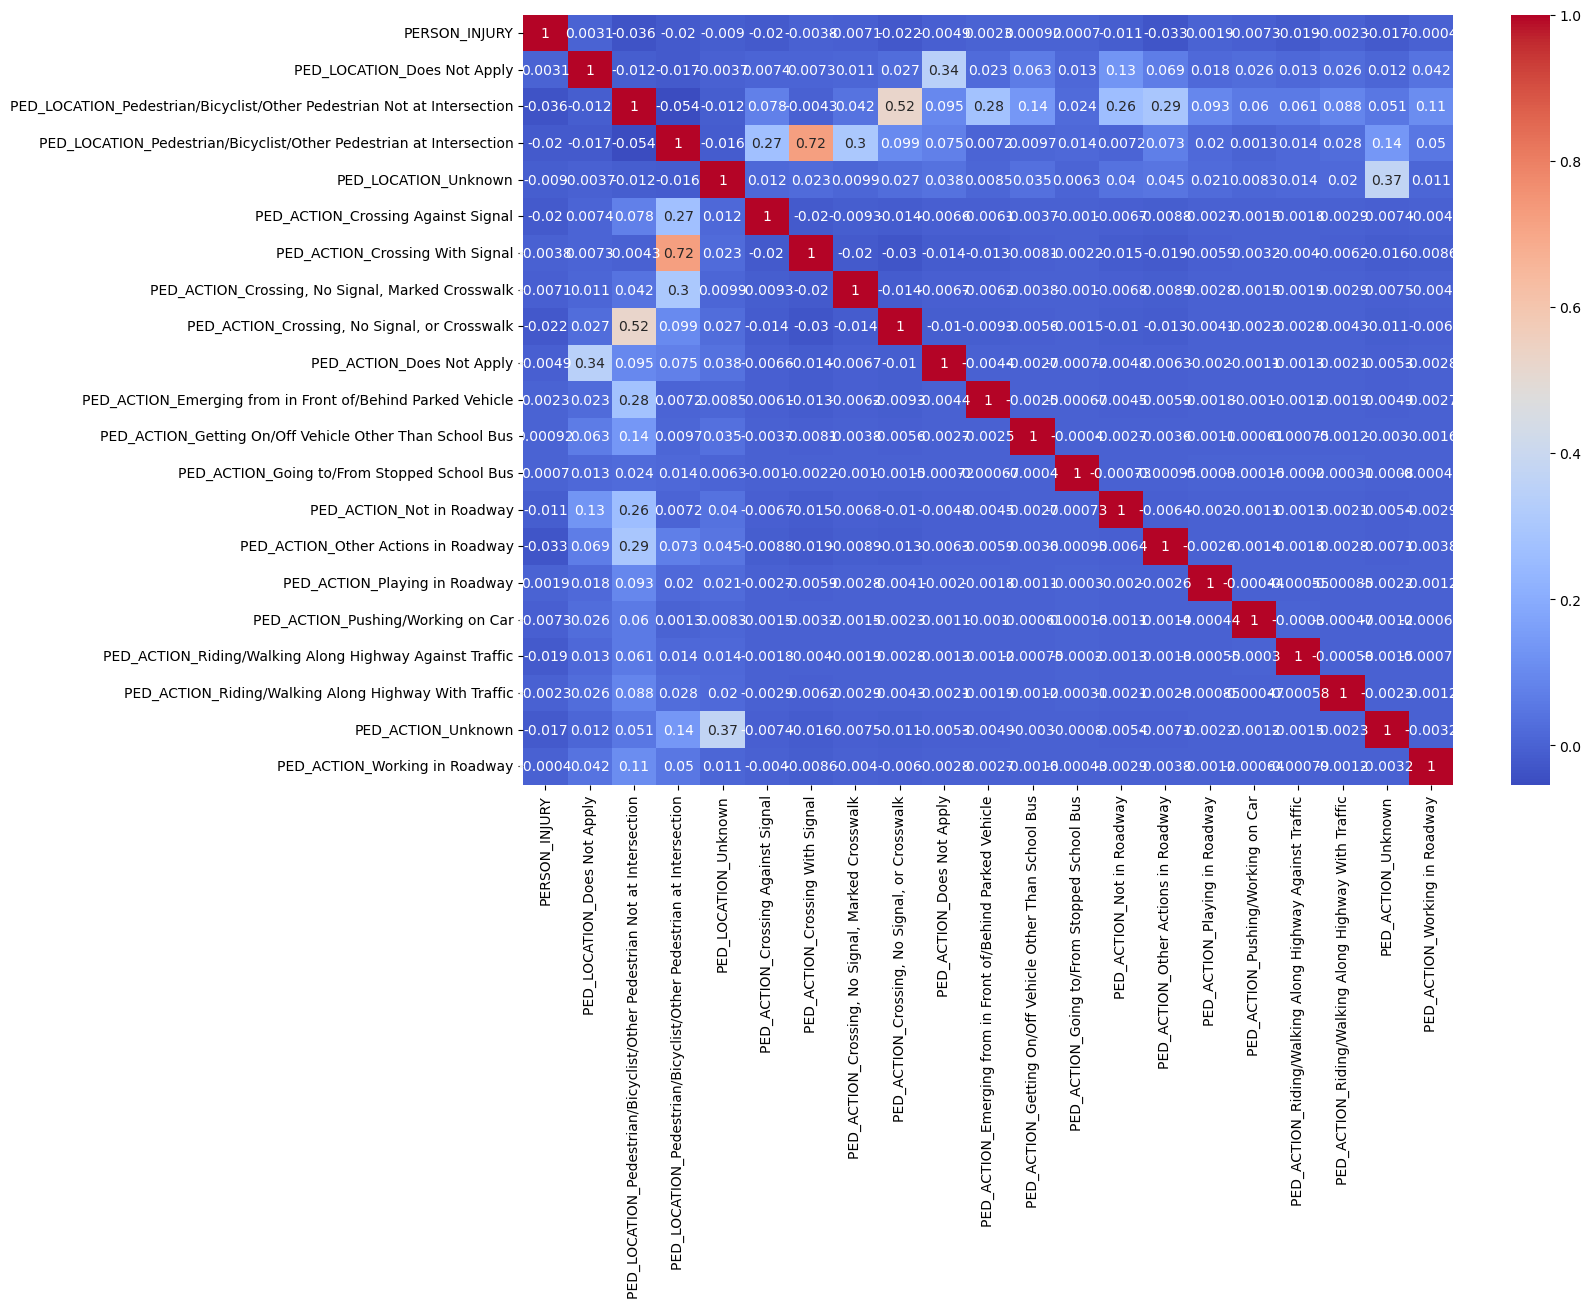

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_encoded is your preprocessed DataFrame
# Select relevant columns for correlation
relevant_columns = ['PERSON_INJURY'] + [col for col in data_encoded.columns if 'PED_LOCATION_' in col or 'PED_ACTION_' in col]

# Create a DataFrame with relevant columns
data_relevant = data_encoded[relevant_columns]

# Encode PERSON_INJURY to numerical values if not already
data_relevant['PERSON_INJURY'] = data_relevant['PERSON_INJURY'].apply(lambda x: 1 if x == 'Injured' else 0)

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_relevant.corr(), annot=True, cmap='coolwarm')
plt.show()


In [10]:
# List columns that match patterns
ped_action_columns = [col for col in data_encoded.columns if col.startswith('PED_ACTION')]
ped_location_columns = [col for col in data_encoded.columns if col.startswith('PED_LOCATION')]

# Print the columns to verify
print("PED_ACTION Columns:", ped_action_columns)
print("PED_LOCATION Columns:", ped_location_columns)


PED_ACTION Columns: ['PED_ACTION_Crossing Against Signal', 'PED_ACTION_Crossing With Signal', 'PED_ACTION_Crossing, No Signal, Marked Crosswalk', 'PED_ACTION_Crossing, No Signal, or Crosswalk', 'PED_ACTION_Does Not Apply', 'PED_ACTION_Emerging from in Front of/Behind Parked Vehicle', 'PED_ACTION_Getting On/Off Vehicle Other Than School Bus', 'PED_ACTION_Going to/From Stopped School Bus', 'PED_ACTION_Not in Roadway', 'PED_ACTION_Other Actions in Roadway', 'PED_ACTION_Playing in Roadway', 'PED_ACTION_Pushing/Working on Car', 'PED_ACTION_Riding/Walking Along Highway Against Traffic', 'PED_ACTION_Riding/Walking Along Highway With Traffic', 'PED_ACTION_Unknown', 'PED_ACTION_Working in Roadway']
PED_LOCATION Columns: ['PED_LOCATION_Does Not Apply', 'PED_LOCATION_Pedestrian/Bicyclist/Other Pedestrian Not at Intersection', 'PED_LOCATION_Pedestrian/Bicyclist/Other Pedestrian at Intersection', 'PED_LOCATION_Unknown']


In [11]:
# Drop columns related to PED_ACTION and PED_LOCATION
data_encoded = data_encoded.drop(columns=ped_action_columns + ped_location_columns)

# Verify the cleaned dataset
data_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 41 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   PERSON_INJURY                                              230656 non-null  object        
 1   PERSON_AGE                                                 229663 non-null  float64       
 2   EJECTION                                                   102787 non-null  object        
 3   BODILY_INJURY                                              126959 non-null  object        
 4   POSITION_IN_VEHICLE                                        102906 non-null  object        
 5   COMPLAINT                                                  126973 non-null  object        
 6   PED_ROLE                                                   126973 non-null  object        
 7   CONTRIBUTING_FACTOR_

In [12]:
data_encoded.head()

,PERSON_INJURY,PERSON_AGE,EJECTION,BODILY_INJURY,POSITION_IN_VEHICLE,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_TYPE_Bicyclist,...,EMOTIONAL_STATUS_Does Not Apply,EMOTIONAL_STATUS_Incoherent,EMOTIONAL_STATUS_Semiconscious,EMOTIONAL_STATUS_Shock,EMOTIONAL_STATUS_Unconscious,EMOTIONAL_STATUS_Unknown,PERSON_SEX_F,PERSON_SEX_M,PERSON_SEX_U,CRASH_DATETIME
0,Injured,27.0,Not Ejected,Back,Driver,Complaint of Pain or Nausea,Driver,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,2019-10-24 19:15:00
1,Injured,24.0,NaN,Shoulder - Upper Arm,NaN,None Visible,Pedestrian,Unspecified,Unspecified,0,...,0,0,0,0,0,0,1,0,0,2019-10-26 01:15:00
2,Injured,42.0,Not Ejected,Knee-Lower Leg Foot,Driver,None Visible,Driver,NaN,NaN,1,...,0,0,0,0,0,1,0,1,0,2019-10-26 08:50:00
3,Injured,36.0,Not Ejected,Back,Driver,Internal,Driver,NaN,NaN,1,...,0,0,0,0,0,0,0,1,0,2019-10-26 19:40:00
4,Injured,50.0,Not Ejected,Head,"Front passenger, if two or more persons, inclu...",Complaint of Pain or Nausea,Passenger,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,2019-10-26 16:50:00


In [13]:
# One-hot encode relevant categorical variables
data_encoded = pd.get_dummies(data_encoded, columns=[  'POSITION_IN_VEHICLE'])


In [14]:
# Fill missing values for crucial columns
data_encoded['PERSON_AGE'].fillna(data_encoded['PERSON_AGE'].median(), inplace=True)
data_encoded['EJECTION'].fillna('Unknown', inplace=True)
data_encoded['BODILY_INJURY'].fillna('None', inplace=True)
data_encoded['CONTRIBUTING_FACTOR_1'].fillna('Unknown', inplace=True)
data_encoded['CONTRIBUTING_FACTOR_2'].fillna('Unknown', inplace=True)


In [15]:
data_encoded.head()

,PERSON_INJURY,PERSON_AGE,EJECTION,BODILY_INJURY,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_TYPE_Bicyclist,PERSON_TYPE_Occupant,...,POSITION_IN_VEHICLE_Does Not Apply,POSITION_IN_VEHICLE_Driver,"POSITION_IN_VEHICLE_Front passenger, if two or more persons, including the driver, are in the front seat",POSITION_IN_VEHICLE_If one person is seated on another person&apos;s lap,"POSITION_IN_VEHICLE_Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile","POSITION_IN_VEHICLE_Middle front seat, or passenger lying across a seat","POSITION_IN_VEHICLE_Middle rear seat, or passenger lying across a seat",POSITION_IN_VEHICLE_Riding/Hanging on Outside,POSITION_IN_VEHICLE_Right rear passenger or motorcycle sidecar passenger,POSITION_IN_VEHICLE_Unknown
0,Injured,27.0,Not Ejected,Back,Complaint of Pain or Nausea,Driver,Unknown,Unknown,0,1,...,0,1,0,0,0,0,0,0,0,0
1,Injured,24.0,Unknown,Shoulder - Upper Arm,None Visible,Pedestrian,Unspecified,Unspecified,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Injured,42.0,Not Ejected,Knee-Lower Leg Foot,None Visible,Driver,Unknown,Unknown,1,0,...,0,1,0,0,0,0,0,0,0,0
3,Injured,36.0,Not Ejected,Back,Internal,Driver,Unknown,Unknown,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Injured,50.0,Not Ejected,Head,Complaint of Pain or Nausea,Passenger,Unknown,Unknown,0,1,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# One-hot encode the remaining categorical columns 
data_encoded = pd.get_dummies(data_encoded, columns=[ 'BODILY_INJURY', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2'])
# Verify the encoded dataset 
print(data_encoded.head())

  PERSON_INJURY  PERSON_AGE     EJECTION  PERSON_TYPE_Bicyclist  \
0       Injured        27.0  Not Ejected                      0   
1       Injured        24.0      Unknown                      0   
2       Injured        42.0  Not Ejected                      1   
3       Injured        36.0  Not Ejected                      1   
4       Injured        50.0  Not Ejected                      0   

   PERSON_TYPE_Occupant  PERSON_TYPE_Other Motorized  PERSON_TYPE_Pedestrian  \
0                     1                            0                       0   
1                     0                            0                       1   
2                     0                            0                       0   
3                     0                            0                       0   
4                     1                            0                       0   

   SAFETY_EQUIPMENT_-  SAFETY_EQUIPMENT_Air Bag Deployed  \
0                   0                                  0

In [17]:
import pandas as pd

# Assuming data_cleaned is your preprocessed DataFrame

# One-hot encode the EJECTION column
data_encoded = pd.get_dummies(data_encoded, columns=['EJECTION'])

# Verify the encoding
print(data_encoded.head())


  PERSON_INJURY  PERSON_AGE  PERSON_TYPE_Bicyclist  PERSON_TYPE_Occupant  \
0       Injured        27.0                      0                     1   
1       Injured        24.0                      0                     0   
2       Injured        42.0                      1                     0   
3       Injured        36.0                      1                     0   
4       Injured        50.0                      0                     1   

   PERSON_TYPE_Other Motorized  PERSON_TYPE_Pedestrian  SAFETY_EQUIPMENT_-  \
0                            0                       0                   0   
1                            0                       1                   0   
2                            0                       0                   0   
3                            0                       0                   0   
4                            0                       0                   0   

   SAFETY_EQUIPMENT_Air Bag Deployed  \
0                                 

In [18]:
 # Label encode PERSON_INJURY column 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
data_encoded['PERSON_INJURY'] = label_encoder.fit_transform(data_encoded['PERSON_INJURY'].fillna('Unknown'))

In [19]:
data_encoded = data_encoded.drop(columns=['CRASH_DATETIME'])

In [20]:
data_encoded.head()

,PERSON_INJURY,PERSON_AGE,PERSON_TYPE_Bicyclist,PERSON_TYPE_Occupant,PERSON_TYPE_Other Motorized,PERSON_TYPE_Pedestrian,SAFETY_EQUIPMENT_-,SAFETY_EQUIPMENT_Air Bag Deployed,SAFETY_EQUIPMENT_Air Bag Deployed/Child Restraint,SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt,...,CONTRIBUTING_FACTOR_2_Unsafe Speed,CONTRIBUTING_FACTOR_2_Unspecified,CONTRIBUTING_FACTOR_2_Vehicle Vandalism,CONTRIBUTING_FACTOR_2_View Obstructed/Limited,EJECTION_Does Not Apply,EJECTION_Ejected,EJECTION_Not Ejected,EJECTION_Partially Ejected,EJECTION_Trapped,EJECTION_Unknown
0,0,27.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,24.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,42.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,36.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,50.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data_encoded.drop(columns=['PERSON_INJURY'])
y = data_encoded['PERSON_INJURY']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Test data: {X_test.shape}, {y_test.shape}')


Training data: (184528, 189), (184528,)
Test data: (46132, 189), (46132,)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# Predict class probabilities 
y_pred_proba = model.predict_proba(X_test)

# Evaluate the model 
y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class="ovr")}')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45916
           1       0.89      0.29      0.44       215
           2       1.00      1.00      1.00         1

    accuracy                           1.00     46132
   macro avg       0.96      0.76      0.81     46132
weighted avg       1.00      1.00      1.00     46132

[[45908     8     0]
 [  153    62     0]
 [    0     0     1]]
ROC AUC Score: 0.914642002602385
